In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [2]:
df1 = pd.read_csv("./raw_data.csv")
df2 = pd.read_csv("./transformed_data.csv")

In [3]:
df1.head()

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494


In [4]:
import datetime as dt
df1["date"] = pd.to_datetime(df1['date'])
df1["year"] = df1["date"].map(lambda x: x.year)
df1["month"] = df1["date"].map(lambda x: x.month)

In [5]:
## Drop columns with no column name 
df1.drop('Unnamed: 9', inplace=True, axis=1)
df1.drop('Unnamed: 10', inplace=True, axis=1)
df1.drop('Unnamed: 11', inplace=True, axis=1)
df1.drop('Unnamed: 12', inplace=True, axis=1)
df1.drop('Unnamed: 13', inplace=True, axis=1)

In [6]:
df2.head()

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.498,0.0,0.0,0.0,17.477233,7.497754
1,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477233,7.497754
2,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,17.477233,7.497754
3,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,17.477233,7.497754
4,AFG,Afghanistan,2020-01-04,0.498,0.0,0.0,0.0,17.477233,7.497754


In [7]:
print('\n', df1.isna().sum())
print('\n', df2.isna().sum())


 iso_code                       0
location                       0
date                           0
total_cases                 3094
total_deaths               11190
stringency_index            7126
population                     0
gdp_per_capita              5712
human_development_index     6202
year                           0
month                          0
dtype: int64

 CODE          0
COUNTRY       0
DATE          0
HDI        6202
TC            0
TD            0
STI           0
POP           0
GDPCAP        0
dtype: int64


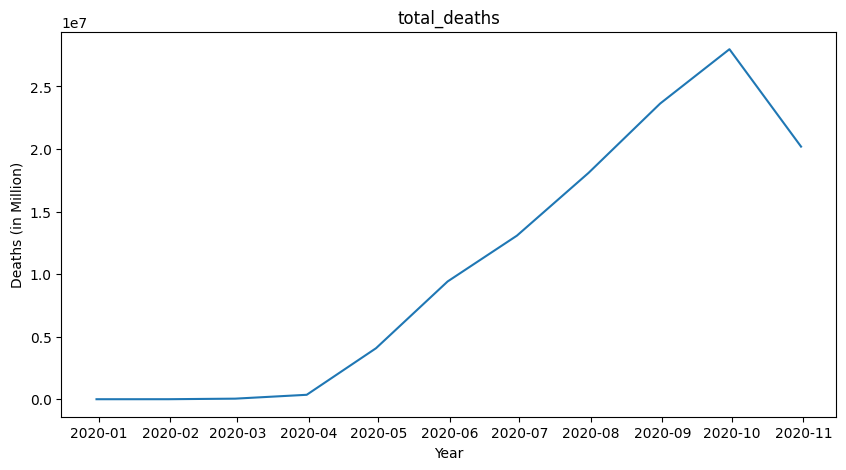

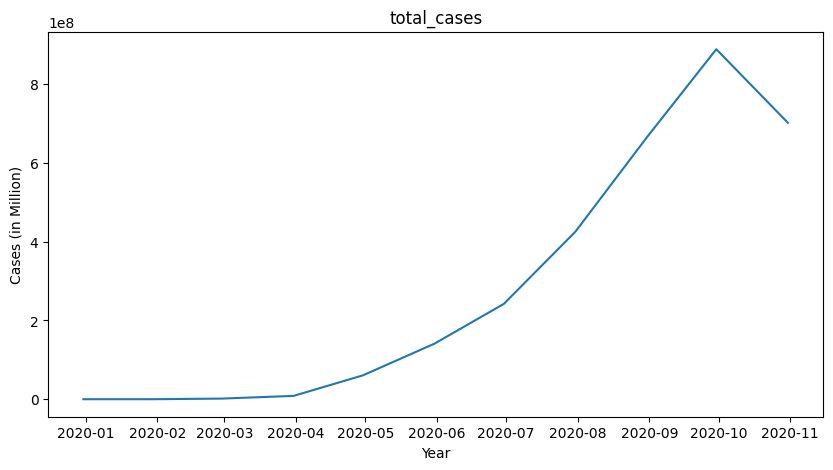

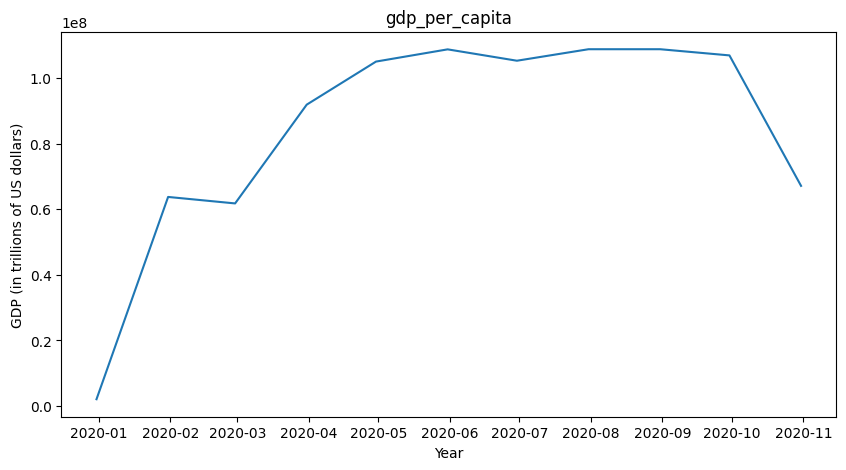

In [8]:

# Load the data
data = pd.read_csv('./raw_data.csv', parse_dates=['date'])

# Set the date column as index
data.set_index('date', inplace=True)

# Resample the data to monthly frequency
data_monthly = data.resample('M').sum()

# Plot the data for total deaths
y_lable = {'total_deaths' : 'Deaths (in Million)', 'total_cases' : 'Cases (in Million)', 'gdp_per_capita' : 'GDP (in trillions of US dollars)'}
for i in ['total_deaths','total_cases','gdp_per_capita']:
    plt.figure(figsize=(10, 5))
    plt.plot(data_monthly[i])
    plt.title(i)
    plt.xlabel('Year')
    plt.ylabel(y_lable[i])
    plt.show()

In [9]:
# Backward-fill the missing values
df1 = df1.fillna(method='bfill') 
df2 = df2.fillna(method='bfill')

In [10]:
print('\n', df1.isna().sum())
print("*"*50)
print('\n', df2.isna().sum())


 iso_code                   0
location                   0
date                       0
total_cases                0
total_deaths               0
stringency_index           0
population                 0
gdp_per_capita             0
human_development_index    0
year                       0
month                      0
dtype: int64
**************************************************

 CODE       0
COUNTRY    0
DATE       0
HDI        0
TC         0
TD         0
STI        0
POP        0
GDPCAP     0
dtype: int64


In [11]:
code = df2["CODE"].unique().tolist()
country = df2["COUNTRY"].unique().tolist()
population = df2["POP"].unique().tolist()
gdp = df2["GDPCAP"].unique().tolist()
hdi = []
tc = []
td = []
sti = []

for i in country:
    hdi.append(((df2.loc[df2["COUNTRY"] == i, "HDI"]).sum())/294)
    tc.append((df1.loc[df1["location"] == i, "total_cases"]).sum())
    td.append((df1.loc[df1["location"] == i, "total_deaths"]).sum())
    sti.append((df2.loc[df2["COUNTRY"] == i, "STI"]).sum()/294)

In [12]:
agg_data = pd.DataFrame(list(zip(code,country,population,tc,td,sti,gdp,hdi)),
                           columns = ["Country_code", "Country", "Total_Population", "Total_Cases","Total_deaths","Stringency_Index","GDP", "Human_Index"]
                       )
agg_data.head()

,Country_code,Country,Total_Population,Total_Cases,Total_deaths,Stringency_Index,GDP,Human_Index
0,AFG,Afghanistan,17.477233,5126433.0,165875.0,3.049673,7.497754,0.498000
1,ALB,Albania,14.872537,1071951.0,31059.0,3.005624,9.376146,0.600765
2,DZA,Algeria,17.596309,4894141.0,206502.0,3.195168,9.540639,0.754000
3,AND,Andorra,11.254996,223591.0,9907.0,2.677654,0.000000,0.659551
4,AGO,Angola,17.307957,304005.0,11836.0,2.965560,8.668969,0.418952


In [13]:
top_df = agg_data.sort_values(by=["Total_Cases"], ascending = False )
top_ten = top_df.head(10)
top_ten.head()

,Country_code,Country,Total_Population,Total_Cases,Total_deaths,Stringency_Index,GDP,Human_Index
27,BRA,Brazil,19.174732,425704574.0,14340645.0,3.136028,9.828942,0.75900
90,IND,India,21.045353,407771689.0,7247400.0,3.610552,9.189712,0.64000
157,RUS,Russia,18.798668,132889015.0,2131745.0,3.380088,7.358760,0.81600
150,PER,Peru,17.311165,74882710.0,3020080.0,3.430126,11.356685,0.59949
125,MEX,Mexico,18.674802,74347562.0,7296012.0,3.019289,10.544307,0.77400


In [14]:

## Bar chart 
fig1 = px.bar(top_ten, x = 'Country', y = 'Total_deaths',
                 hover_data = ['Total_Cases','GDP'], color = 'Total_Cases',
                 labels = {'Total_deaths':'Total deaths of the country'}, height = 400
             )
fig1.show()

In [15]:
## Top ten country with highest Population
pop_df = agg_data.sort_values(by = ['Total_Population'], ascending = False)
top_pop= pop_df.head(10)
top_pop

,Country_code,Country,Total_Population,Total_Cases,Total_deaths,Stringency_Index,GDP,Human_Index
41,CHN,China,21.087439,21632319.0,1066950.0,3.892554,8.493189,0.752000
90,IND,India,21.045353,407771689.0,7247400.0,3.610552,9.189712,0.640000
91,IDN,Indonesia,19.426899,21570383.0,916187.0,3.640149,11.090272,0.694000
145,PAK,Pakistan,19.213186,37738242.0,789717.0,3.385802,10.800502,0.562000
27,BRA,Brazil,19.174732,425704574.0,14340645.0,3.136028,9.828942,0.759000
141,NGA,Nigeria,19.144064,6107452.0,125557.0,3.504161,9.468993,0.532000
15,BGD,Bangladesh,18.919572,35266216.0,484572.0,3.186410,9.739678,0.477714
157,RUS,Russia,18.798668,132889015.0,2131745.0,3.380088,7.358760,0.816000
125,MEX,Mexico,18.674802,74347562.0,7296012.0,3.019289,10.544307,0.774000
99,JPN,Japan,18.655567,7659484.0,194918.0,3.178414,10.292968,0.909000


In [16]:

fig2 = px.bar(top_pop, x = 'Country', y = 'Total_Population', text_auto = '.2s',
                     title = "Total Population by Countries"
             )
fig2.show()

In [17]:
TC = top_pop["Total_Cases"]
TD = top_pop["Total_deaths"]
CO = top_pop["Country"]
PO = top_pop["Total_Population"]

In [18]:
Total = pd.DataFrame(list(zip(CO,PO,TC,TD)), columns = ['Countries','Total Population','Cases', 'Deaths'])
Total1= Total.copy()
Total1

,Countries,Total Population,Cases,Deaths
0,China,21.087439,21632319.0,1066950.0
1,India,21.045353,407771689.0,7247400.0
2,Indonesia,19.426899,21570383.0,916187.0
3,Pakistan,19.213186,37738242.0,789717.0
4,Brazil,19.174732,425704574.0,14340645.0
5,Nigeria,19.144064,6107452.0,125557.0
6,Bangladesh,18.919572,35266216.0,484572.0
7,Russia,18.798668,132889015.0,2131745.0
8,Mexico,18.674802,74347562.0,7296012.0
9,Japan,18.655567,7659484.0,194918.0


In [19]:
fig6 = px.bar(Total1, x='Countries', y=['Cases', 'Deaths'])
fig6.show()

In [20]:
fig6 = px.pie(Total1, values='Cases', names='Countries', title='Total Covid Cases of the World', color_discrete_sequence=px.colors.sequential.RdBu)
fig6.show()

Text(0.5, 1.0, 'Relation between HDI and GDP per capita')

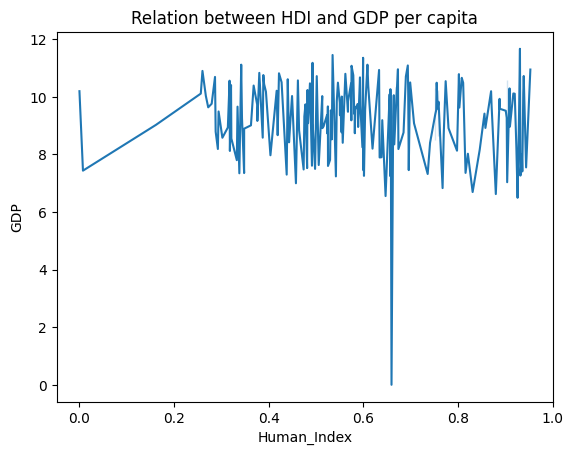

In [21]:
sns.lineplot(data=agg_data[['Human_Index', 'GDP']], x="Human_Index", y="GDP").set_title('Relation between HDI and GDP per capita')

In [22]:
fig = px.scatter(agg_data, x="GDP", y="Total_Population", size="Total_Cases",  color='Country', template='simple_white', size_max=50)
fig.update_layout(
    height=500,
    title_text="COVID-19 Cases vs GDP per Capita (per Country)"
)
fig.show()

## Modelling

In [23]:
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn import svm, metrics, tree, linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [24]:
df1.head()

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,year,month
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498,2019,12
1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,1803.987,0.498,2020,1
2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341,1803.987,0.498,2020,1
3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.0,38928341,1803.987,0.498,2020,1
4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.0,38928341,1803.987,0.498,2020,1


In [25]:
scaler = MinMaxScaler()

num_vars =['total_cases','total_deaths','stringency_index','population','gdp_per_capita','human_development_index','year','month']
df1[num_vars] = scaler.fit_transform(df1[num_vars])

X = df1.drop(['iso_code','date','location','gdp_per_capita'], axis=1)
y= df1['gdp_per_capita']



# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



## Linear Regressor

In [26]:
linear_regressor = LinearRegression().fit(X_train, y_train)
train_score = linear_regressor.score(X_train, y_train)
print('Training Score - ', train_score)


pred = linear_regressor.predict(X_test)

r23 = r2_score(y_test, pred)

print('Test R2 Score -', r23)

mae = mean_absolute_error(y_test, pred)
print('mae -', mae)

mse = mean_squared_error(y_test, pred)
print('mse -', mse)

rmse = np.sqrt(mse)
print('rmse -', rmse)

Training Score -  0.4579870773849751
Test R2 Score - 0.4607414806699349
mae - 0.08070747319735322
mse - 0.016575976409256045
rmse - 0.128747723899322


Text(0, 0.5, 'pred')

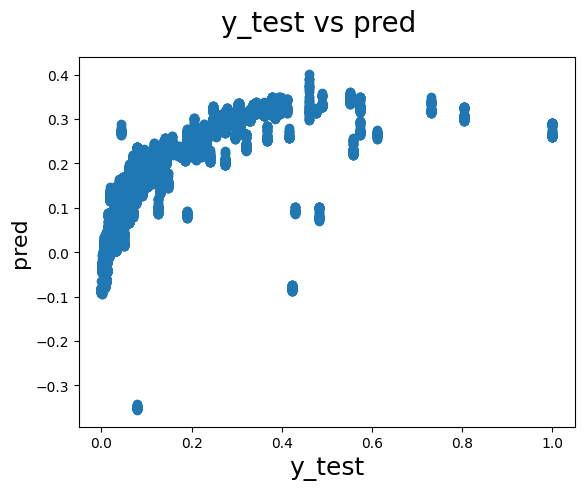

In [27]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,pred)
fig.suptitle('y_test vs pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('pred', fontsize=16)   

## Decision Tree regressor

In [75]:
decision_tree_regressor = tree.DecisionTreeRegressor(max_depth=10).fit(X_train, y_train)

train_score = decision_tree_regressor.score(X_train, y_train)

print('Training Score - ',train_score)

pred = decision_tree_regressor.predict(X_test)

n_leaves = decision_tree_regressor.get_n_leaves()
print(f"Number of leaf nodes: {n_leaves}")

r22 = r2_score(y_test, pred)

print('R2 Score -', r22)

mae = mean_absolute_error(y_test, pred)
print('mae -', mae)

mse = mean_squared_error(y_test, pred)
print('mse -', mse)

rmse = np.sqrt(mse)
print('rmse -', rmse)

Training Score -  0.9982277094499715
Number of leaf nodes: 229
R2 Score - 0.998312779198857
mae - 0.0031419903829354736
mse - 5.186256905444378e-05
rmse - 0.007201567124900231


Text(0, 0.5, 'pred')

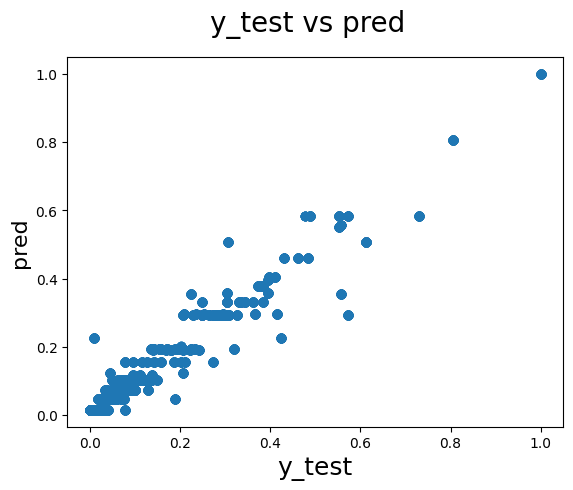

In [63]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,pred)
fig.suptitle('y_test vs pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('pred', fontsize=16)   

## SVM regressor

In [30]:
svr_regressor = svm.SVR().fit(X_train, y_train)

train_score = svr_regressor.score(X_train, y_train)

print('Training Score - ',train_score)

pred = svr_regressor.predict(X_test)

r21 = r2_score(y_test, pred)

print('R2 Score -', r21)

mae = mean_absolute_error(y_test, pred)
print('mae -', mae)

mse = mean_squared_error(y_test, pred)
print('mse -', mse)

rmse = np.sqrt(mse)
print('rmse -', rmse)

Training Score -  0.5908134557001194
R2 Score - 0.5893593862872469
mae - 0.0769462636064861
mse - 0.01262246006616872
rmse - 0.11234972214548962


Text(0, 0.5, 'pred')

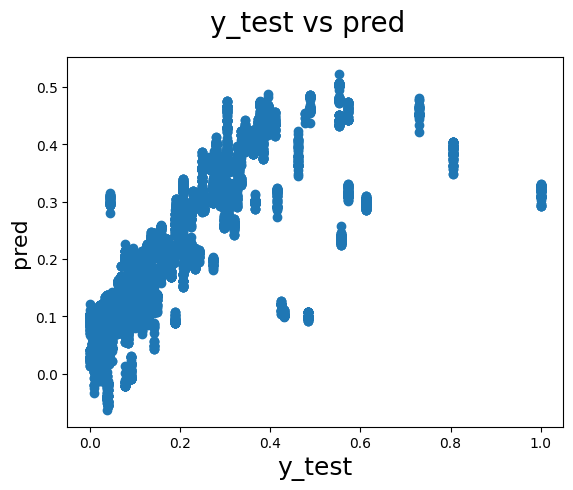

In [31]:

# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,pred)
fig.suptitle('y_test vs pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('pred', fontsize=16)   

## XG Boost

In [32]:

train, test = train_test_split(df1, test_size=0.2, random_state=123)
# Define the features and target variable

features = ['total_cases','total_deaths','stringency_index','population','gdp_per_capita','human_development_index']
target = 'gdp_per_capita'

# Convert the data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(train[features], label=train[target])
dtest = xgb.DMatrix(test[features], label=test[target])

# Set the XGBoost parameters
params = {
    'objective': 'reg:squarederror',
    'max_depth': 3,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 123
}

# Train the XGBoost model
model = xgb.train(params, dtrain, num_boost_round=100, evals=[(dtest, 'test')])

train_score = r2_score(train[target], model.predict(dtrain))

print('Trainning Score - ',train_score)

#Predict the target variable on the test set
y_pred = model.predict(dtest)

r21 = r2_score(test[target], y_pred)

print('R2 Score -', r21)

mae = mean_absolute_error(test[target], y_pred)
print('MAE -', mae)

mse = mean_squared_error(test[target], y_pred)
print('MSE -', mse)

rmse = np.sqrt(mse)
print('RMSE -', rmse)



[0]	test-rmse:0.33495
[1]	test-rmse:0.30168
[2]	test-rmse:0.27703
[3]	test-rmse:0.24954
[4]	test-rmse:0.22477
[5]	test-rmse:0.20246
[6]	test-rmse:0.18237
[7]	test-rmse:0.16425
[8]	test-rmse:0.14796
[9]	test-rmse:0.13328
[10]	test-rmse:0.12007
[11]	test-rmse:0.10818
[12]	test-rmse:0.09843
[13]	test-rmse:0.08970
[14]	test-rmse:0.08188
[15]	test-rmse:0.07481
[16]	test-rmse:0.06745
[17]	test-rmse:0.06081
[18]	test-rmse:0.05486
[19]	test-rmse:0.05030
[20]	test-rmse:0.04544
[21]	test-rmse:0.04194
[22]	test-rmse:0.03923
[23]	test-rmse:0.03647
[24]	test-rmse:0.03394
[25]	test-rmse:0.03080
[26]	test-rmse:0.02884
[27]	test-rmse:0.02626
[28]	test-rmse:0.02395
[29]	test-rmse:0.02189
[30]	test-rmse:0.02008
[31]	test-rmse:0.01846
[32]	test-rmse:0.01705
[33]	test-rmse:0.01641
[34]	test-rmse:0.01523
[35]	test-rmse:0.01462
[36]	test-rmse:0.01422
[37]	test-rmse:0.01328
[38]	test-rmse:0.01288
[39]	test-rmse:0.01215
[40]	test-rmse:0.01148
[41]	test-rmse:0.01089
[42]	test-rmse:0.01038
[43]	test-rmse:0.0098

Text(0, 0.5, 'pred')

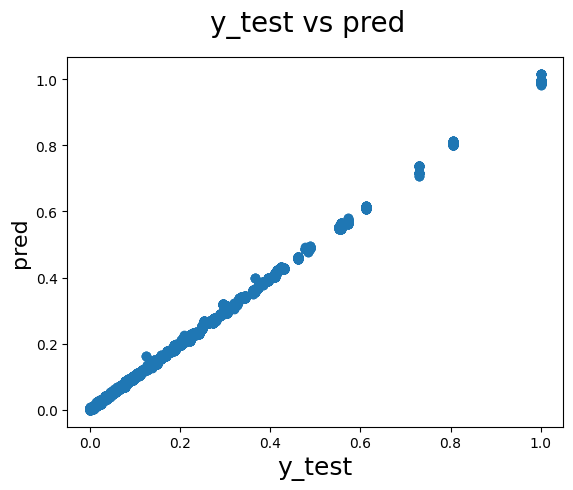

In [33]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(test[target], y_pred)
fig.suptitle('y_test vs pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('pred', fontsize=16)   

## Naïve Bayes classifier

Train_Accuracy: 0.8425893786879556
Accuracy: 0.8420269734232447


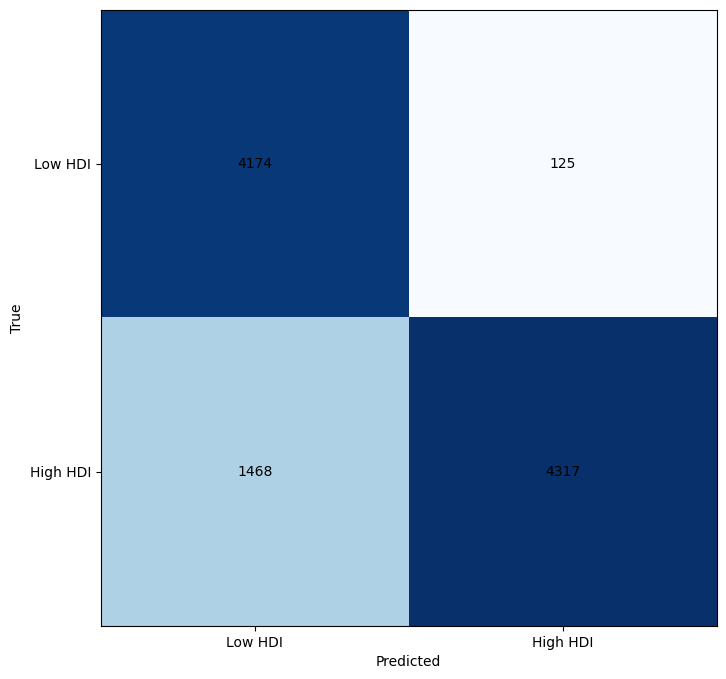

In [34]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


# Select the relevant columns for classification
features = ['total_cases', 'total_deaths', 'stringency_index', 'population', 'gdp_per_capita', 'human_development_index']
data = df1
# Convert the 'human_development_index' column into binary outcomes
data['hdi_binary'] = data['human_development_index'].apply(lambda x: 1 if x >= data['human_development_index'].mean() else 0)

# Split the dataset into training and testing data
train, test = train_test_split(data, test_size=0.2, random_state=42)

# Train the Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(train[features], train['hdi_binary'])

# Predict the outcomes for the testing data
y_pred = gnb.predict(test[features])

train_accuracy = accuracy_score(train['hdi_binary'], gnb.predict(train[features]))
print('Train_Accuracy:', train_accuracy)

# Evaluate the performance of the classifier
accuracy = accuracy_score(test['hdi_binary'], y_pred)
print('Accuracy:', accuracy)

# Create a confusion matrix
cm = confusion_matrix(test['hdi_binary'], y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap='Blues')
ax.grid(False)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['Low HDI', 'High HDI'])
ax.set_yticklabels(['Low HDI', 'High HDI'])
for i in range(2):
    for j in range(2):
        ax.text(j, i, str(cm[i][j]), ha='center', va='center', color='black')
plt.show()


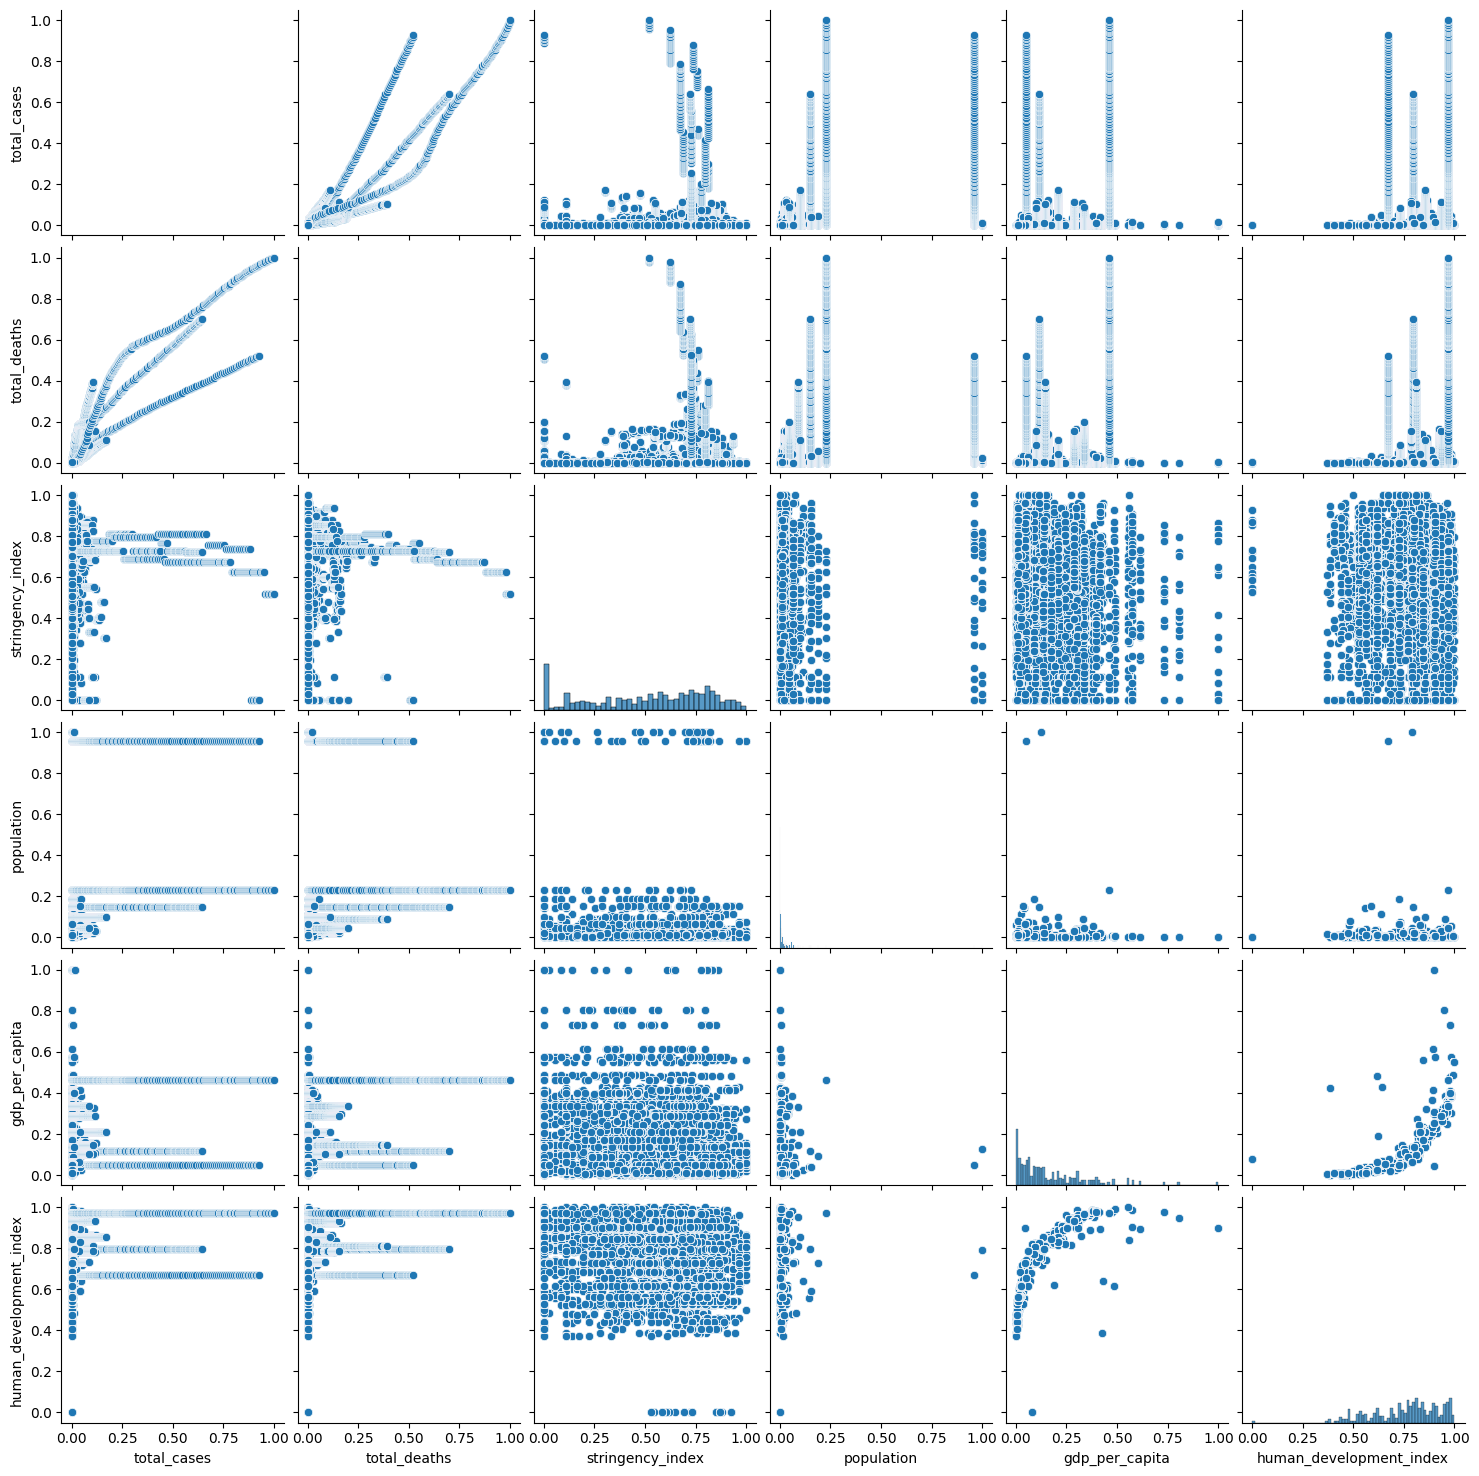

                         total_cases  total_deaths  stringency_index  \
total_cases                 1.000000      0.911208          0.073718   
total_deaths                0.911208      1.000000          0.084515   
stringency_index            0.073718      0.084515          1.000000   
population                  0.291132      0.237206          0.064622   
gdp_per_capita              0.058844      0.094360         -0.154437   
human_development_index     0.076683      0.127103         -0.172741   

                         population  gdp_per_capita  human_development_index  
total_cases                0.291132        0.058844                 0.076683  
total_deaths               0.237206        0.094360                 0.127103  
stringency_index           0.064622       -0.154437                -0.172741  
population                 1.000000       -0.066743                -0.020563  
gdp_per_capita            -0.066743        1.000000                 0.672792  
human_development_ind

In [35]:

# Load the dataset
data = df1

# Compute the Pearson correlation coefficients
corr = data[['total_cases', 'total_deaths', 'stringency_index', 'population', 'gdp_per_capita', 'human_development_index']].corr()

# Visualize the pairwise relationships using scatterplots
sns.pairplot(data[['total_cases', 'total_deaths', 'stringency_index', 'population', 'gdp_per_capita', 'human_development_index']])
plt.show()

# Print the correlation matrix
print(corr)



In [36]:

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Convert the 'GDP_growth_rate' column into binary outcomes
data = df1
data['GDP_growth_binary'] = data['gdp_per_capita'].apply(lambda x: 1 if x >= 0 else 0)

#print(data['gdp_per_capita'].unique())

# Select the features to be used for classification
features = ['total_cases', 'total_deaths', 'stringency_index', 'population', 'gdp_per_capita', 'human_development_index']

# Split the dataset into training and testing data
train, test = train_test_split(data, test_size=0.2, random_state=42)

# Train the Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(train[features], train['GDP_growth_binary'])

# Predict the outcomes for the testing data
y_pred = gnb.predict(test[features])

train_accuracy = accuracy_score(train['GDP_growth_binary'], gnb.predict(train[features]))
print("Train Accuracy: ", train_accuracy)

# Evaluate the performance of the classifier
accuracy = accuracy_score(test['GDP_growth_binary'], y_pred)
print('Accuracy:', accuracy)


Train Accuracy:  1.0
Accuracy: 1.0


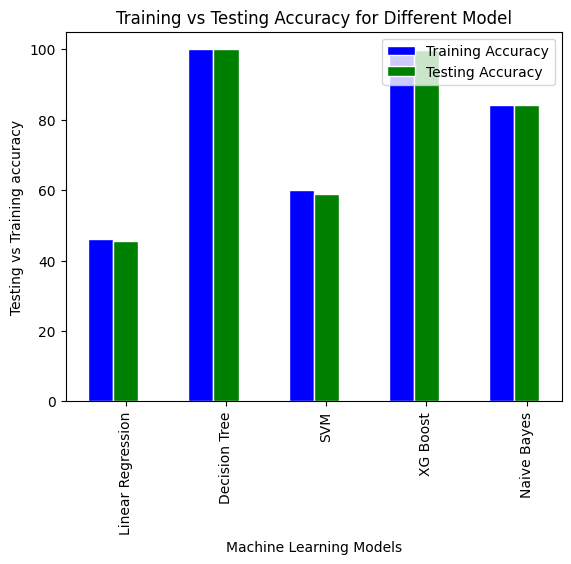

In [38]:
models = ['Linear Regression', 'Decision Tree', 'SVM', 'XG Boost', 'Naive Bayes']
run_time = [0.8, 0.1, 31.7, 1.2, 40.5]
training_accuracy = [46.03, 100, 60.06, 99.94, 84.25]
testing_accuracy = [45.64, 99.99, 59.01, 099.93, 84.2]


barWidth = 0.25

# Set the positions of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Create the bar plot
plt.bar(r1, training_accuracy, color='blue', width=barWidth, edgecolor='white', label='Training Accuracy')
plt.bar(r2, testing_accuracy, color='green', width=barWidth, edgecolor='white', label='Testing Accuracy')

# Add xticks on the middle of the group bars
plt.xticks([r + barWidth for r in range(len(models))], models, rotation=90)

# Add labels and title
plt.xlabel('Machine Learning Models')
plt.ylabel('Testing vs Training accuracy')
plt.title('Training vs Testing Accuracy for Different Model')

# Add legend
plt.legend()

# Show the plot
plt.show()

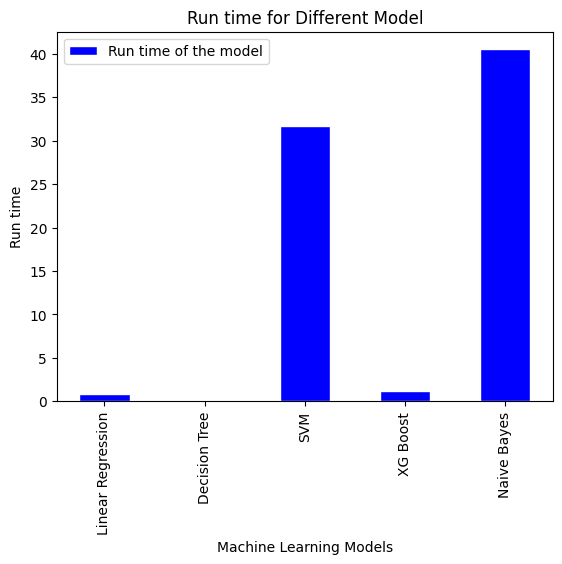

In [46]:
models = ['Linear Regression', 'Decision Tree', 'SVM', 'XG Boost', 'Naive Bayes']
run_time = [0.8, 0.1, 31.7, 1.2, 40.5]


barWidth = 0.50

# Set the positions of the bars on the x-axis
r1 = np.arange(len(models))

# Create the bar plot
plt.bar(r1, run_time, color='blue', width=barWidth, edgecolor='white', label='Run time of the model')

# Add xticks on the middle of the group bars
plt.xticks([r for r in range(len(models))], models, rotation=90)

# Add labels and title
plt.xlabel('Machine Learning Models')
plt.ylabel('Run time')
plt.title('Run time for Different Model')

# Add legend
plt.legend()

# Show the plot
plt.show()

## Removing China Data and running XG Boost

In [49]:
#Count of entire data
total_count = df1.shape[0]
print('Count of the DF before removing china data',total_count)
#removing China data
df2 = df1.loc[df1['location'] != 'China']
count = df2.shape[0]
print('Count of the DF before removing china data',count)

Count of the DF before removing china data 50418
Count of the DF before removing china data 50124


In [50]:
#Count of entire data
total_count = df1.shape[0]
print('Count of the DF before removing china data',total_count)
#removing China data
df2 = df1.loc[df1['location'] != 'China']
count = df2.shape[0]
print('Count of the DF before removing china data',count)

train, test = train_test_split(df2, test_size=0.2, random_state=123)
# Define the features and target variable

features = ['total_cases','total_deaths','stringency_index','population','gdp_per_capita','human_development_index']
target = 'gdp_per_capita'

# Convert the data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(train[features], label=train[target])
dtest = xgb.DMatrix(test[features], label=test[target])

# Set the XGBoost parameters
params = {
    'objective': 'reg:squarederror',
    'max_depth': 3,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 123
}

# Train the XGBoost model
model = xgb.train(params, dtrain, num_boost_round=100, evals=[(dtest, 'test')])

train_score = r2_score(train[target], model.predict(dtrain))

print('Trainning Score - ',train_score)

#Predict the target variable on the test set
y_pred = model.predict(dtest)

r21 = r2_score(test[target], y_pred)

print('R2 Score -', r21)

mae = mean_absolute_error(test[target], y_pred)
print('MAE -', mae)

mse = mean_squared_error(test[target], y_pred)
print('MSE -', mse)

rmse = np.sqrt(mse)
print('RMSE -', rmse)



Count of the DF before removing china data 50418
Count of the DF before removing china data 50124
[0]	test-rmse:0.33344
[1]	test-rmse:0.30594
[2]	test-rmse:0.27554
[3]	test-rmse:0.24815
[4]	test-rmse:0.22552
[5]	test-rmse:0.20526
[6]	test-rmse:0.18493
[7]	test-rmse:0.17095
[8]	test-rmse:0.15401
[9]	test-rmse:0.13878
[10]	test-rmse:0.12509
[11]	test-rmse:0.11424
[12]	test-rmse:0.10302
[13]	test-rmse:0.09291
[14]	test-rmse:0.08383
[15]	test-rmse:0.07566
[16]	test-rmse:0.07054
[17]	test-rmse:0.06376
[18]	test-rmse:0.05766
[19]	test-rmse:0.05219
[20]	test-rmse:0.04813
[21]	test-rmse:0.04369
[22]	test-rmse:0.04054
[23]	test-rmse:0.03690
[24]	test-rmse:0.03363
[25]	test-rmse:0.03144
[26]	test-rmse:0.02959
[27]	test-rmse:0.02799
[28]	test-rmse:0.02654
[29]	test-rmse:0.02530
[30]	test-rmse:0.02335
[31]	test-rmse:0.02166
[32]	test-rmse:0.02010
[33]	test-rmse:0.01879
[34]	test-rmse:0.01759
[35]	test-rmse:0.01655
[36]	test-rmse:0.01606
[37]	test-rmse:0.01564
[38]	test-rmse:0.01481
[39]	test-rmse:

Text(0, 0.5, 'pred')

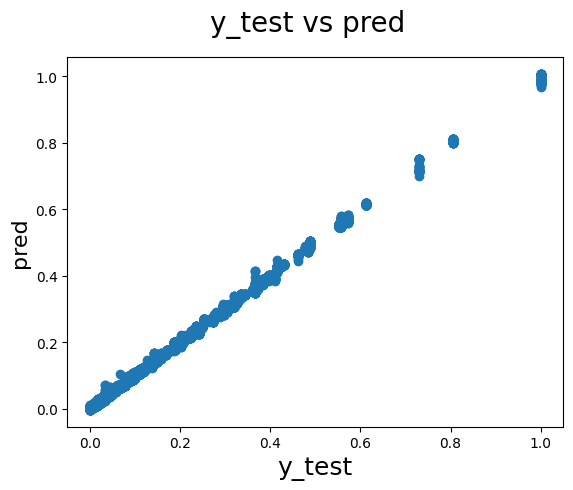

In [51]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(test[target], y_pred)
fig.suptitle('y_test vs pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('pred', fontsize=16) 